In [1]:
import numpy as np
import matplotlib.pyplot as plt

# No work and all play
...die Formel! Ich hab das hier mal als Jupyter Notebook gemacht. Evtl kann Markus da was mit anfangen und direkt darin mit den Formeln und vor allem der letzten Grafik rumspielen.

## Teil 1: Macht, Psyche, Struktur
Alle drei Werte sind im Prinzip aequivalent, allerdings sollte es einen Anreiz geben sich nicht nur auf einen davon zu konzentrieren. Ausserdem sollten gegen Ende zur befreiten Gesellschaft hin der genaue Wert nahe 0 nicht mehr allzu wichtig sein, und sich alles eher auf die Lust konzentrieren. Daher wuerde ich vorschlagen, die Ausgangswerte (nennen wir sie $F_1, F_2, F_3$ zunaechst mal in "interne" Zwischenwerte umzurechnen, die "saettigen" wenn der jeweilige Wert $F_i$ auf 0 zugeht, und ausserdem positiv sind (weil negativ nervt). Ich hab ein wenig rumgebastelt und bin darauf gekommen dass eine gute Formel fuer die jeweiligen Zwischenwerte $G_i$ waere:

$$G_i = \frac{(F_i+C)\cdot(1+1/k)}{F_i+C\cdot(1+1/k)}$$.

Dabei ist $C$ der positive Wert zum schlechtestmoeglichen Wert, also bei euren Zahlen $C=500$. Die Konstante $k$ beschreibt das Saettigungsverhalten, also wie stark der Einfluss des jeweiligen Ausgangswert auf den Zwischenwert abnimmt. Ausserdem bleibt praktischerweise $G_i$ immer zwischen 0 und 1 (solange die Werte nicht positiv werden) Laesst sich einfacher als Kurve erklaeren...

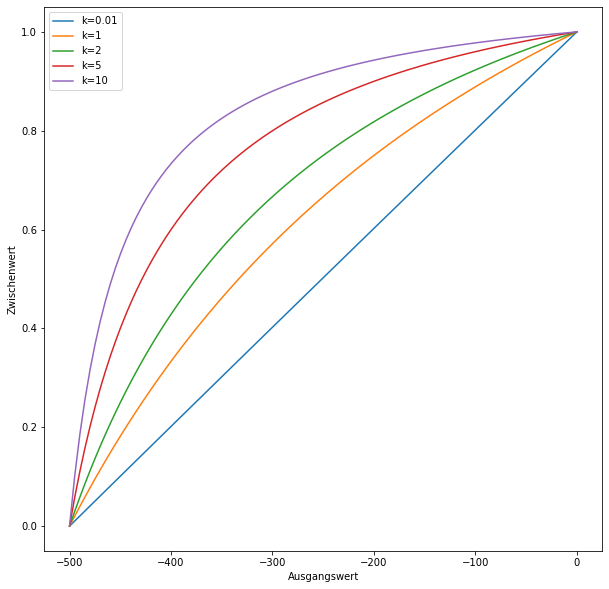

In [19]:
# Die Formel:
G = lambda F, C, k: (F+C)*(1+1/k)/(F+C*(1+1/k))

plt.figure(figsize=(10,10))
f = np.linspace(-500,0,100)
for kk in [0.01,1,2,5,10]:
    plt.plot(f, G(f, 500, kk), label=f'k={kk}')
    
plt.legend()
plt.xlabel('Ausgangswert')
plt.ylabel('Zwischenwert');

...so ist das doch ganz einleuchtend hoffe ich. Jetzt koennen wir einen weiteren Zwischenwert $Z$ einfuehren, der die Teilwerte einfach mittelt:

$$Z=\frac{1}{3}\sum_{i=1}^3 G_i =\frac{(1+1/k)}{3}\sum_{i=1}^3 \frac{F_i+C}{F_i+C\cdot(1+1/k)}$$,

wobei die Summe ueber die drei Ausgangswerte $F_1, F_2, F_3$, also Macht, Psyche, Strukture laeuft.
Dieser Wert verhaeltet sich dann genauso: die Manager sind am Anfang auf 0, und man kommt auf 1 wenn man alle Werte auf 0 gebracht hat. Damit haben wir die drei Werte der "alten Gesellschaft" schon mal ganz schoen zusammengefasst.

## Teil 2: Lust
Damit zur neuen Gesellschaft und der Lust. Letztlich waere das einfachste, und inhaltlich auch ganz gut passende, den Lustwert $L$ einfach mit dem Zwischenwert $Z$ zu multiplizieren um den letztlichen Score $S$ zu bekommen:

$$S=L\cdot Z$$

Das Verhalten liesse sich damit ungefaehr so beschreiben: Am Anfang ist die beste Strategie, alle Werte gleichermassen zu verbessern, da der Score einfach das Produkt aus der Summe der durchschnittlichen "Verbesserung" der alte-Gesellschaft-Werte (nichts anderes ist $Z$ solange die Ausgangswerte tief negativ sind) und der Lust ist. Wenn die alte Welt zu Ende geht, saettigt nun aber der Z-Wert immer mehr (um letztlich bei 1 anzukommen) und es lohnt sich nicht mehr da viel reinzustecken. Die Lust aber waechst ungebremst weiter. Der maximale Score den man am Ende erreichen kann (wenn also alle anderen Werte auf 0 sind) entspricht einfach dem Lustwert. Hier nochmal der Versuch einer Grafik, bei der ich mal angenommen habe es gaebe nur einen Alte-Welt-Wert $F$. Spielt mal mit dem `k_wert` falls ihr das Notebook zum laufen bekommt.

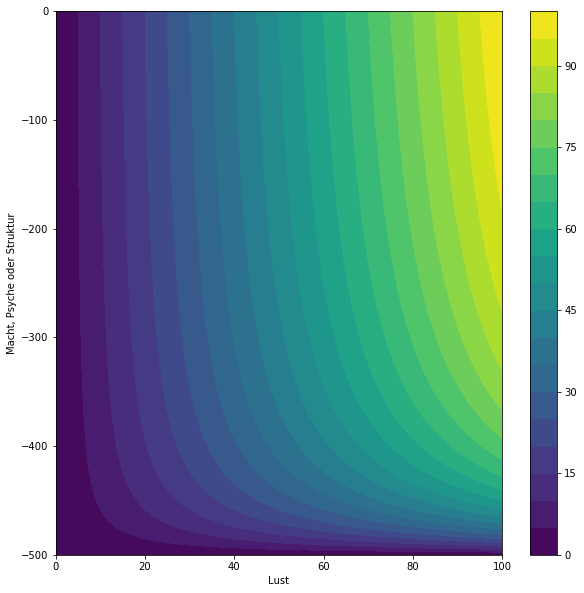

In [33]:
S = lambda L, F, C, k: L * G(F, C, k)

maximale_lust = 100
k_wert = 10

ll = np.linspace(0,maximale_lust,100)
ff = np.linspace(-500,0,100)
LL, FF = np.meshgrid(ll, ff)

plt.figure(figsize=(10,10))
plt.contourf(LL, FF, S(LL, FF, 500, k_wert), levels=20)
plt.colorbar()
plt.xlabel('Lust')
plt.ylabel('Macht, Psyche oder Struktur');

...die optimale Strategie in dem Plot ist immer den steilstmoeglichen Anstieg der Farbskala (also dem Score) zu finden. Am Anfang macht man das am besten diagonal, aber irgendwann lohnt es sich vor allm auf die Lust zu achten.